# 1. (7 points)
Suppose we have a set of data points $X = \{x_1, . . . , x_m\}$ in $R^n$


## (a) (2 points) 
Let $x_c$ be the centroid of $X$, i.e., the average of all the data points.
We want to find the point $y$ in the convex hull $H$ of $X$ that is farthest from $x_c$.
Formulate the optimization problem to find $y$ and prove that it is a convex optimization problem.

Prove that the optimal solution is a vertex of the convex hull H.

problem 

$$ max ||y-x_c|| = max f(y)$$
$$s.t.  y \in H$$

Choose any point $v$ in $H$ i.e. $v = \sum_{i=1}^m{\lambda_i x_i}$
$| \sum_i \lambda_i = 1$

$f(v) = f(\sum_{i=1}^m{\lambda_i * x_i}) \leq  \sum_{i=1}^m \lambda_i f({ x_i}) \leq \sum_{i=1}^m \lambda_i max f({ x_i})= \sum_{i=1}^m \lambda_i f(x^*) = f(x^*)$

$f(v) \leq f(x^*)$ where $x^*$ is one of the points $x_i$ that is the one of the vertex in $H$. => $f$ reaches the maximum at one of the vertexes of $H$.


## (b) (1 point)
Let u be a vector that is orthogonal to $(y − x_c)$, where $y$ is the optimal solution from (a).
We want to find the point x in the convex hull H that maximizes the inner product $(x − x_c)^T u$

Formulate the optimization problem to find $x$ and prove that the optimal solution is another vertex of the convex hull $H$.

problem  
$$ max f(x) = max (x-x_c)^T u$$
$$ s.t. x \in H$$
$$(y-x_c)^T u = 0$$

Similarly (a) using Jensen's inequality: $f(x) \leq f(x^*)$ where $x^*$ is one of the vertex of $H$.
As far as $f(x_c)=f(y) =0$ => f cannot reach the maxima on the vertex $y$ because in this case f would reach maxima on $x_c$ which is not the vertex - contradiction. => f reaches maxima on one of the vertexes $\{x_i\} / y$.

## (c)(2 points)
Let $E_x = \{x ∈ R^n: (x − c)^T Q(x − c) ≤ n\}$ be the ellipsoid with the smallest volume that contains all the points in X.

Formulate the optimization problem to find Ex, and prove that the convex hull H of
X is contained in E.

problem:

volume of ellipsoid $\sqrt{det(Q^{-1})}*vol(B(0,r)) \approx \sqrt{det(Q^{-1})}r^n$
$$\min \sqrt{det(Q^{-1})}r^n$$
$$s.t. (x_i − c)^T Q(x_i − c) \leq n $$

or 
$$\min \log(\sqrt{det(Q^{-1})}r^n)$$
$$s.t. (x_i − c)^T Q(x_i − c) \leq n $$

as far as hessian of $(x − c)^T Q(x − c)$ is $Q > 0$ => it is convex function and sublevel set of a convex function is convex => all points in $H \in E_x$

## (d)(1 point) 
Define $z_k = [x_k, 1]^T$, and $E_z = \{z ∈ R_{n+1}: z^T Pz ≤ n + 1\}$ the ellipsoid with smallest volume which contains all $z_k$.
Prove that
$$R= 
\begin{array}{|c|c|}
  Q & -Qc \\ 
  -(Qc)^T & 1+c^TQc \\ 
\end{array}
$$

$$
\begin{align*}
z_k^T R z & = [x_k^T Q - (Qc)^T| -x^TQc + c^TQc +1]z =\\
& = x_k^TQx_k - (Qc)^Tx_k -x^TQc + c^TQc +1 = \\
& = (x_k^T - c^T)Q(x_k +c)+1
\end{align*}
$$

$$
\begin{align*}
& z_k^T R z \leq n +1\\
& (x_k^T - c^T)Q(x_k +c)+1\leq n+1 \\
& (x_k - c)^TQ(x_k +c)\leq n

\end{align*}
$$

## (e)
Show an example to illustrate finding the ellipsoid Ex from Ez.

$$R= 
\begin{bmatrix}
R_{11} & R_{12}\\
R_{21} & R_{12}
\end{bmatrix}\\
\begin{align*}\\
R_{11}  &= Q\\
R_{12}  &= R_{21}^T = -Qc\\
R_{22}  &= 1 + c^TQc\\\\

Q &= R_{11}\\
c &= Q^{-1}Qc= -R_{11}^{-1} R_{12}\\
\end{align*}
$$


In [30]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
R = np.random.rand(N, N)
R = (R + R.T) / 2

Q = R[: N - 1, : N - 1]
c = -np.linalg.inv(Q) @ R[: N - 1, -1]

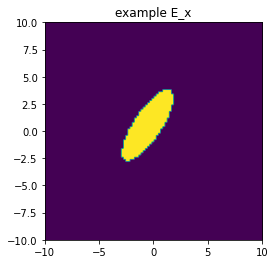

In [31]:
r = 1
X = np.linspace(-10, 10, 100)
Y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(X, Y)
is_inside = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(Y.shape[0]):
        z = np.array([X[i, j], Y[i, j]])
        is_inside[i, j] = (z - c).T @ Q @ (z - c) < r
plt.title("example E_x")
plt.imshow(is_inside, extent=[-10, 10, -10, 10])
plt.show()

# 2
Derive optimality conditions and analytical solution (if it exists) of the following optimization problems, solve them. Demonstrate the problem and compare the results with those obtained by CVX or CVXpy.


$ b ∈ R^n$ is vectorization of an image corrupted by Gaussian noise, A is of size $n × m, m > n, x ∈ R^m$.
$A$ can be concatenation of discrete cosine transform matrix and wavelets
transform operators.


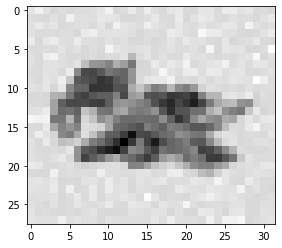

In [3]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

response = requests.get("https://leafy.id/wp-content/uploads/2019/12/p9.jpg")
img = Image.open(BytesIO(response.content)).convert("L")
size = (32, 28)
img_resized = img.resize(size, Image.Resampling.LANCZOS)
image = np.array(img_resized)
y = image.flatten()
noize = np.abs(np.random.randn(y.shape[0])) * 10
b = (y + noize) / 255
# b = y / 255
plt.imshow(b.reshape(image.shape), cmap="gray")

## (a)
$$
\begin{align*}
& \min_x \quad ||x-b||_2^2 \quad x \geq 0, 1^T x =1 \\
& \mathcal{L} = \frac{1}{2}||x − b||_2^2 + \lambda^Tx + \gamma (1^T x - 1) \quad s.t. \lambda_ix_i=0\\
& \frac{\partial\mathcal{L}}{\partial x} = (x-b) +\lambda + \gamma 1 = 0\\\\
& \text{if $\lambda_i$ = 0 =>}x-b + \gamma 1 = 0 => x^* = b-\mathbf{1\gamma}\\
& \mathbf{1^T}x^* = \mathbf{1^T}b-\mathbf{1^T}\mathbf{1\gamma} = 1\\
& \gamma = \frac{\mathbf{1^T}b -1}{count(x_i>0)}\\\\
& \text{if $\lambda_i \neq 0$ => }x_i =0\\
& x_i = 
\begin{matrix}
b- \frac{\mathbf{1^T}b -1}{count(x_i>0)}& \text{if $x_i >0$} \\
0 & \text{else}
\end{matrix}
\end{align*}\\
$$



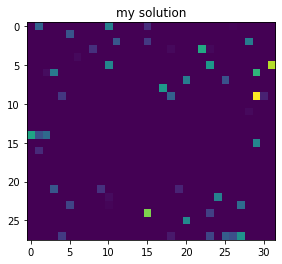

In [4]:
x_star = np.ones_like(b)
for i in range(10):
    ones = np.ones(sum(x_star > 0))
    x_star[x_star > 0] = b[x_star > 0] + ones * (1 - ones.T @ b[x_star > 0]) / sum(ones)
    if (x_star < 0).any():
        x_star[x_star < 0] = 0
    else:
        break
plt.title("my solution")
plt.imshow(x_star.reshape(image.shape))
plt.show()

c:\Users\Slava\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


comperison of solutions max(x^* - x_cvx)= 0.0003038433837581067


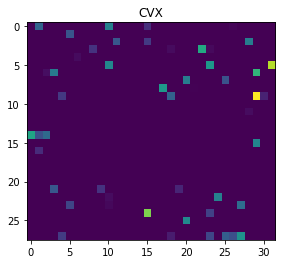

In [5]:
import cvxpy as cp

x = cp.Variable(b.shape[0])
objective = cp.Minimize(cp.sum_squares(x - b))
constraints = [0 <= x, np.ones_like(b) @ x == 1]
prob = cp.Problem(objective, constraints)
result = prob.solve()
print(f"comperison of solutions max(x^* - x_cvx)= {max(abs(x.value-x_star))}")
plt.title("CVX")
plt.imshow(x.value.reshape(image.shape))
plt.show()

## (b)
$$
\begin{align*}
& \min_x \quad ||x-b||_2^2 \quad x \geq 0, ||x||_\infty \leq1 \\

& \min_x ||x-b||_2^2 = \min_x \sum{(x_i-b_i)^2}=\sum{\min_{x_i} (x_i-b_i)^2}\\
& \min_x ||x-b||_2^2 \text{ equivalent to }\min_{x_i} (x_i-b_i)^2 \text{ for all $i$}\\

& \text{$f(x_i)$ reaches minima on $x_i = b_i$, but $\max(x) \leq 1$ =>}\\
& x_i = \min(b_i,1)\\
& \text{as far as $b_i \geq 0 => x_i \geq 0$ is always satisfied}\\
& \text{but in general } x_i = \min(\max(b_i,0),1)\\
\end{align*}\\
$$


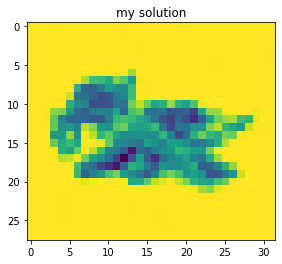

In [6]:
ones = np.ones_like(b)
x_star = np.array([min(1, b_i) for b_i in b])
plt.title("my solution")
plt.imshow(x_star.reshape(image.shape))
plt.show()

comperison of solutions max(x^* - x_cvx)= 8.195022338508551e-08


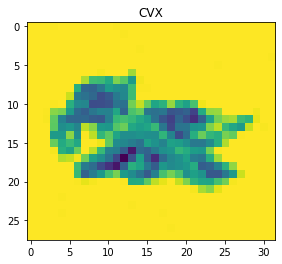

In [7]:
x = cp.Variable(b.shape[0])
objective = cp.Minimize(cp.sum_squares(x - b))
constraints = [0 <= x, cp.norm(x, "inf") <= 1]
prob = cp.Problem(objective, constraints)
result = prob.solve(solver=cp.ECOS)
print(f"comperison of solutions max(x^* - x_cvx)= {max(abs(x.value-x_star))}")
plt.title("CVX")
plt.imshow(x.value.reshape(image.shape))
plt.show()

## (c)
$$
\begin{align*}
& \min_x \quad ||b - Ax||_2^2 \quad \text{s.t.} \quad ||x||^2_2 \leq 1 \\
& \mathcal{L} =  \frac{1}{2}||b - Ax||_2^2 + \frac{1}{2}\lambda (||x||^2_2 - 1)\\
& \frac{\partial\mathcal{L}}{\partial x} = A^T(Ax-b) + \lambda x = 0\\
& \text{By complementary slackness if $\lambda = 0 => ||x||^2_2 < 1$} \\
& x^* = (A^TA)^{-1}A^Tb \quad \text{if $||x^*||^2_2 < 1$}\\
& \text{By complementary slackness if $\lambda \neq 0 => ||x||^2_2 = 1$} \\
& x^* = (A^TA + \lambda I)^{-1}A^Tb \quad \text{if $||x^*||^2_2 = 1$}\\
& x^Tx =b^TA(A^TA + \lambda I)^{-1}(A^TA + \lambda I)^{-1}A^Tb = \\
& A = U\Lambda V^T\\
& (A^TA + \lambda I)^{-1} = (V \Lambda U^T U\Lambda V^T +\lambda I)^{-1}=\\
& \quad = (V(\Lambda^2+\lambda I)V^T)^{-1} = V(\Lambda^2+\lambda I)^{-1}V^T =\\
& \quad = VQV^T = V diag(\frac{1}{\sigma_i^2 + \lambda})V^T\\
& x^Tx =b^TU\Lambda V^TVQV^TVQV^TV\Lambda U^Tb = b^TU\Lambda QQ\Lambda U^Tb\\
& z = U^Tb\\
& x^Tx = z^T \Lambda QQ\Lambda z = \sum \frac{\sigma_i^2 z_i^2}{(\sigma_i^2 + \lambda)^2} = 1\\
& \text{I couldn't find $\lambda$ analiticaly and did numerically}\\
& x^* = (A^TA + \lambda I)^{-1}A^Tb \quad \text{for} \quad \sum\frac{\sigma_i^2 z_i^2}{(\sigma_i^2 + \lambda)^2} = 1\\
& x^* = (A^TA)^{-1}A^Tb \quad \text{if $||x^*||^2_2 < 1$}\\
\end{align*}\\
$$

In [8]:
n = 10
A = np.random.random((b.shape[0], n)) / 10

In [9]:
def get_constraint(sigma, z, lam):
    return sum((sigma**2 * z**2) / (sigma**2 + lam) ** 2)


x_star = np.linalg.inv(A.T @ A) @ A.T @ b

if np.linalg.norm(x_star, 2) >= 1:
    U, Sigma, V = np.linalg.svd(A, full_matrices=False)
    V = V.T
    lam = np.random.random(1)
    z = U.T @ b
    lr = 1e2

    ### Finding lambda numerically
    for i in range(100):
        constraint = get_constraint(Sigma, z, lam)
        if abs(constraint - 1) < 1e-4:
            print(f"we found it!! lambda = {lam}")
            break
        else:
            lam += lr * np.log(constraint)
        print(constraint, lam)
    x_star = np.linalg.inv(A.T @ A + lam * np.eye(n)) @ A.T @ b

31.920053869675883 [346.47246925]
0.12461649501584124 [138.22103949]
0.654126052620688 [95.77551898]
1.2047652184872895 [114.40398983]
0.90039710453595 [103.91205126]
1.0553262136531176 [109.2970439]
0.9712111626789581 [106.3759074]
1.0155368586871647 [107.91764714]
0.9917728727367306 [107.09153146]
1.004401389813731 [107.53070466]
0.997658083447886 [107.29623835]
1.001249728416777 [107.42113316]
0.9993341321612099 [107.3545242]
1.0003550740637466 [107.39002531]
0.9998107399978018 [107.37109751]
1.00010090219022 [107.38118722]
we found it!! lambda = [107.38118722]


In [10]:
x = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A @ x - b))
constraints = [cp.norm(x, 2) ** 2 <= 1]
prob = cp.Problem(objective, constraints)
result = prob.solve(solver=cp.ECOS)
print(f"comperison of solutions max(x^* - x_cvx)= {max(abs(x.value-x_star))}")

comperison of solutions max(x^* - x_cvx)= 8.828499188429095e-06


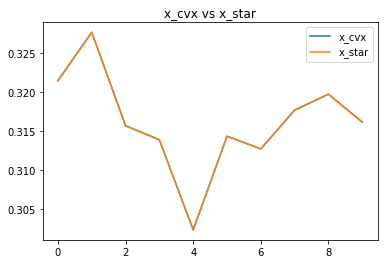

In [11]:
plt.title("x_cvx vs x_star")
plt.plot(x.value, label="x_cvx")
plt.plot(x_star, label="x_star")
plt.legend()
plt.show()

# 3 (4 points) Clustering
Consider images in the MNIST dataset for three digits 0, 1, and 2. Denote by $Y =
[y_1, . . . , y_K]$ a matrix of vectorization of the images.

## (a)
Solve the following optimization problem to find an orthogonal matrix U and a feature matrix, $X = [x_1, . . . , x_K]$, of size $R \times K$
$$
\begin{align*}
\min \quad  &||Y-UX||^2_F\\
\text{s.t.}\quad & U^TU = I_R\\
& X \geq 0 \quad X^T 1_r=1_k
\end{align*}\\
\begin{align*}\\
\min_U ||Y-UX||^2_F &= \min_U ||Y||^2_F +||UX||^2_F - 2\langle Y|UX\rangle = \\
& = \min_U  ||X||^2_F - 2trace(Y^TUX) =  \max_U trace(UXY^T)\\
XY^T &= A \Lambda B^T \\
\max_U trace(UXY^T) & = \max_U trace(UA \Lambda B^T) = \max_U trace(B^TUA \Lambda)\\
 & = \max_U \sum Q_{ij} * \sigma_{ij}=\max_U \sum Q_{ii} * \sigma_{ii} \\
\end{align*}\\
\text{Where $Q = B^TUA $ is orthogonal matrix with largest elements on diagonal =>}\\
\text{$Q$ is $I$}\\
\begin{align*}\\
B^TUA &= I\\
U^* &= BA^T
\end{align*}\\
\min_X ||Y-UX||^2_F\quad  X \geq 0 \quad X^T 1_r=1_k \\
\begin{align*}\\
\mathcal{L} & = \frac{1}{2}||UX  - Y||^2_F +trace(\Gamma X) + \lambda^T (X^T 1_r - 1_k)\\
\frac{\partial\mathcal{L}}{\partial x} &=U^T(UX-Y) + 1_r\lambda^T +\Gamma^T = 0\\
&\text{By complementary slackness if $\Gamma_{ij} = 0 => X_{ij} > 0$}\\
\frac{\partial\mathcal{L}}{\partial x} &=U^T(UX-Y) + 1_r\lambda^T = 0\\
& X = U^TY - 1_r\lambda^T\\
& x_i = U^T y_i - 1_r\lambda_i\\ 
& x_i^T1_r = y_i^TU1_r - \lambda_i 1_r^T1_r = 1\\ 
& \lambda_i = \frac{y_i^TU1_r -1_k}{R}\\ 
& \text{from assumption $x_i >0$ we are filling posotive $x_i$ => $R = count(x_i>0)$}\\

& x_i = U^T y_i - 1_r\frac{y_i^TU1_r -1}{R} = U^T y_i - 1_r\frac{1_r^TU^Ty_i -1}{R} = (I_R - \frac{1_r1_r^T}{R})U^Ty_i + \frac{1_r}{R}\\
& x^*_i =
\begin{matrix}
(I_R - \frac{1_r1_r^T}{R})U^Ty_i + \frac{1_r}{R} & \text{ if $x_{ij} > 0, R = count(x_i>0)$}\\
0& \text{ else}
\end{matrix}\\
\end{align*}\\

$$

In [12]:
def get_U_star(X, Y):
    A, Sigma, B = np.linalg.svd(X @ Y.T, full_matrices=False)
    B = B.T
    U_star = B @ A.T
    return U_star


def get_X_star(X, Y, U):
    for _ in range(30):
        for i in range(Y.shape[1]):
            x = X[:, i]
            y = Y[:, i]

            R = sum(x > 0)
            I = np.eye(R)
            ones = np.ones(R)
            b = U.T @ y
            x[x > 0] = b[x > 0] + ones * (1 - ones.T @ b[x > 0]) / R
            x[x < 0] = 0
            X[:, i] = x
        if (X < 0).any():
            X[X < 0] = 0
        else:
            return X
    return X


def get_score(X, U, Y):
    norm = np.linalg.norm(Y - U @ X, "fro") ** 2
    return norm

In [13]:
R = 8
K = 7
N = 20
X = np.ones((R, K))
Y = np.random.random((N, K))
U = np.random.random((N, R))
prev_score = 1e10
for _ in range(200):
    U = get_U_star(X, Y)
    X = get_X_star(X, Y, U)
    score = get_score(X, U, Y)
    if abs(prev_score - score) < 1e-5:
        break
    print(score)
    prev_score = score

X_star = X
U_star = U

26.585521759939382
25.4922655606652
25.951271104965073
26.060792991494758
25.03928378211884
24.221101189974345
24.28839584115279
24.125804149046065
24.070576674528738
24.050870808397775
23.936343547421252
24.038117174995755
24.03728410525974


proofs

In [14]:
print("orthogonality")
print(np.round(U_star.T @ U_star))
print("count x <0:", np.sum(X_star < 0))
print("X.T @ 1==", X.T @ np.ones(R))

orthogonality
[[ 1.  0. -0.  0. -0. -0. -0. -0.]
 [ 0.  1.  0. -0.  0. -0. -0. -0.]
 [-0.  0.  1. -0. -0. -0. -0.  0.]
 [ 0. -0. -0.  1. -0. -0. -0. -0.]
 [-0.  0. -0. -0.  1.  0. -0.  0.]
 [-0. -0. -0. -0.  0.  1. -0. -0.]
 [-0. -0. -0. -0. -0. -0.  1.  0.]
 [-0. -0.  0. -0.  0. -0.  0.  1.]]
count x <0: 0
X.T @ 1== [1. 1. 1. 1. 1. 1. 1.]


In [15]:
from keras.datasets import mnist

In [16]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
digints = (Y_test == 0) | (Y_test == 1) | (Y_test == 2)
X_data = X_test[digints][:100]  # I took first 100 elements
Y_data = Y_test[digints][:100]
Y_mnist = X_data.reshape(-1, Y_data.shape[0])

In [17]:
Y_mnist = X_data.reshape(-1, Y_data.shape[0])

In [18]:
R = 3
K = Y_mnist.shape[1]
N = Y_mnist.shape[0]
X = np.ones((R, K))
Y = Y_mnist
U = np.random.random((N, R))
prev_score = 1e10
for _ in range(200):
    U = get_U_star(X, Y)
    X = get_X_star(X, Y, U)
    score = get_score(X, U, Y)
    print(score)
    if abs(prev_score - score) < 1e-9:
        break
    prev_score = score
X_star = X
U_star = U

486395046.732778
474199824.9103841
494792826.2126571
494749089.74226916
494749089.74226916


proofs

In [19]:
print("orthogonality")
print(np.round(U_star.T @ U_star))
print("count x <0:", np.sum(X_star < 0))
print("X.T @ 1==", X.T @ np.ones(R))

orthogonality
[[ 1.  0.  0.]
 [ 0.  1. -0.]
 [ 0. -0.  1.]]
count x <0: 0
X.T @ 1== [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


Text(0.5, 1.0, 'X_star')

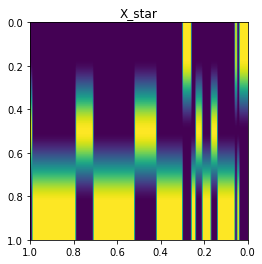

In [20]:
plt.imshow(X_star, extent=[1, 0, 1, 0])
plt.title("X_star")

Text(0.5, 1.0, 'U_star')

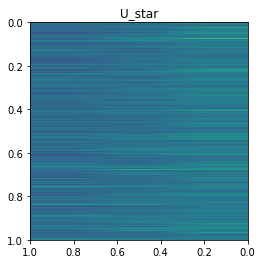

In [21]:
plt.imshow(U_star, extent=[1, 0, 1, 0])
plt.title("U_star")

## (b)
On the basis of extracted features, xk, apply the K-means algorithm to predict categorical labels of images

I am not from computer science. I tried to figure out how to do it but it took a very long time.

# 4
Solve the following optimization problem by applying optimality condition


$$
\begin{align*}
\min \quad & \sum_{i=1}^n \alpha_i \ln x_i \\
s.t \quad&  \sum_{i=1}^n x_i =1 , \quad x>=0\\
\text{where $\alpha_i<0$}
\end{align*}\\
\begin{align*}\\
f(x) & = \sum_{i=1}^n \alpha_i \ln x_i \\
\sum_{i=1}^n x_i &=1 => 1^Tx_i =1=> \frac{\partial f}{\partial x_i} = \mu \\
\frac{\partial f}{\partial x_i} & = \frac{\alpha_i}{x_i}=\mu => x_i =\frac{\alpha_i}{\mu}\\
\sum x_i &= \sum \frac{\alpha_i}{\mu} = \frac{\sum \alpha_i}{\mu} = 1 =>\mu = \sum \alpha_i\\
x_i & = \frac{\alpha_i}{\sum \alpha_i}\\
\end{align*}\\
\text{ $x_i$ is always positive since numerator and denominator are negative}\\
$$
$$x_i^* = \frac{\alpha_i}{\sum \alpha_i}$$






In [22]:
alpha = -np.random.random(5)
alpha

array([-0.92554023, -0.48035466, -0.09634361, -0.79935013, -0.3758014 ])

In [23]:
x = cp.Variable(alpha.shape)
objective = cp.Minimize(cp.sum(alpha.T @ cp.log(x)))
constraints = [cp.sum(x) == 1, x >= 0]
prob = cp.Problem(objective, constraints)
result = prob.solve(solver=cp.ECOS)

In [24]:
x_star = alpha / sum(alpha)
print(f"comperison of solutions max(x^* - x_cvx)= {max(abs(x.value-x_star))}")

comperison of solutions max(x^* - x_cvx)= 9.108299192650549e-08


# 5


$$
\text{Prove that the function $f(x) = \log(\sum \exp(x_k))$ is convex}\\
\begin{align*}
\frac{\partial f}{ \partial x_i} &= \frac{e^{x_i}}{\sum e^{x_k}}\\
\frac{\partial f^2}{ \partial x_i \partial x_j} &= -\frac{e^{x_i} e^{x_j}}{(\sum e^{x_k})^2}\\
\frac{\partial f^2}{ \partial x_i \partial x_i} &= \frac{e^{x_i}}{\sum e^{x_k}} -\frac{e^{x_i} e^{x_i}}{(\sum e^{x_k})^2} \\
z_i &= \frac{e^{x_i}}{\sum e^{x_k}}\\
H &= diag(z) - z z^T\\\\

v^THv &= \sum z_i v_i^2 - (\sum z_iv_i)^2\\
\end{align*}\\
\text{according to Cauchy-Schwarz inequality}\\
(\sum z_i^{1/2}z_i^{1/2}v_i)^2 \leq (\sum (z_i^{1/2})^2)(\sum (z_i^{1/2})^2v_i^2)=\\
 = (\sum z_i)(\sum z_iv_i^2) = \sum z_iv_i^2\\
\text{so first term $\sum z_i v_i^2$ is non-negative and greater then second term $(\sum z_iv_i)^2$}\\
\text{ => $H \geq 0 $ => f(x) is convex}
$$

$$
\begin{align*}
&\text{Let's prove that exist such $z$ and $v$ that $v^THv =0$}\\
&\text{Let $z_i$ be the constant $z_i = \zeta$}\\
&v^THv = \sum z_i v_i^2 - (\sum z_iv_i)^2 = \zeta \sum v_i^2 - \zeta^2 (\sum v_i)^2\\
&\text{Assume $v_i$ is constant too $v_i = \mu$}\\
&v^THv = \zeta n \mu^2 - \zeta^2 (n\mu)^2 = \zeta n \mu^2 - \zeta^2 n^2\mu^2\\
& \text{taking into account $\sum z_i = 1$ i.e. $\sum \zeta = n\zeta = 1$}\\
&v^THv= \zeta n \mu^2 - \zeta^2 n^2\mu^2 = \mu^2 - \mu^2 = 0\\
& \text{Hessian is not strictly > than 0 mean f(x) is not strictly convex}
\end{align*}
$$


In [25]:
x = np.ones(10) * 2
z = np.exp(x) / sum(np.exp(x))
v = np.ones(10) * 8
H = np.diag(z) - z[:, None] @ z[:, None].T
v.T @ H @ v

1.0436096431476471e-14